# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675970 sha256=0af173d2719301ef1a85b9cede148132935e370efbdb7b22c647d49841a5d7e8
  Stored in directory: c:\users\14168\appdata\local\pip\cache\wheels\ca\bd\d1\2bee2b54030fe2e29a1a6a7b10e6781aff17bdff423fc401d6
Successfully built citipy


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
unit = "metric"
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
parameter_1 = 'q='
parameter_2 = '&appid='
url = f"{base_url}{parameter_1}"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}{parameter_2}{weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]- 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d')


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | zvishavane
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | balsas
Processing Record 14 of Set 1 | port-vila
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | suomussalmi
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | s

Processing Record 40 of Set 4 | okha
Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | onokhoy
Processing Record 45 of Set 4 | angaur state
Processing Record 46 of Set 4 | cole harbour
Processing Record 47 of Set 4 | luumaki
Processing Record 48 of Set 4 | raduzhny
Processing Record 49 of Set 4 | wailua homesteads
Processing Record 0 of Set 5 | alappuzha
Processing Record 1 of Set 5 | buenaventura
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | el calafate
Processing Record 4 of Set 5 | bac kan
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | yangor
City not found. Skipping...
Processing Record 7 of Set 5 | guacamayas
Processing Record 8 of Set 5 | shohimardon
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | jwaneng
Processing Record 11 of Set 5 | ahau
City not found. Skipping...
Processing Record 1

Processing Record 36 of Set 8 | tobi village
City not found. Skipping...
Processing Record 37 of Set 8 | lethem
Processing Record 38 of Set 8 | happy valley-goose bay
Processing Record 39 of Set 8 | berezovo
Processing Record 40 of Set 8 | posto fiscal rolim de moura
Processing Record 41 of Set 8 | mahibadhoo
Processing Record 42 of Set 8 | letlhakane
Processing Record 43 of Set 8 | remire-montjoly
Processing Record 44 of Set 8 | codajas
Processing Record 45 of Set 8 | yorkton
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 47 of Set 8 | i-n-salah
Processing Record 48 of Set 8 | tongouson
Processing Record 49 of Set 8 | pokrovsk
Processing Record 0 of Set 9 | dhidhdhoo
Processing Record 1 of Set 9 | wilmington island
Processing Record 2 of Set 9 | brzeg dolny
Processing Record 3 of Set 9 | pante makasar
City not found. Skipping...
Processing Record 4 of Set 9 | sabirabad
Processing Record 5 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 6 o

Processing Record 19 of Set 12 | rongelap
Processing Record 20 of Set 12 | lagdo
Processing Record 21 of Set 12 | karagandy
Processing Record 22 of Set 12 | sarnen
Processing Record 23 of Set 12 | palu
Processing Record 24 of Set 12 | samamea
City not found. Skipping...
Processing Record 25 of Set 12 | udaipur
Processing Record 26 of Set 12 | hilo
Processing Record 27 of Set 12 | gadzhiyevo
Processing Record 28 of Set 12 | roswell
Processing Record 29 of Set 12 | mombetsu
Processing Record 30 of Set 12 | patacamaya
Processing Record 31 of Set 12 | nova vicosa
Processing Record 32 of Set 12 | zomin shaharchasi
City not found. Skipping...
Processing Record 33 of Set 12 | kolondieba
Processing Record 34 of Set 12 | marennes
Processing Record 35 of Set 12 | essaouira
Processing Record 36 of Set 12 | lorengau
Processing Record 37 of Set 12 | peterhead
Processing Record 38 of Set 12 | tataouine
Processing Record 39 of Set 12 | changping
Processing Record 40 of Set 12 | port alberni
Processin

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,8.23,56,100,0.45,US,2023-04-18
1,ushuaia,-54.8000,-68.3000,5.81,70,100,1.54,AR,2023-04-18
2,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,2023-04-18
3,grytviken,-54.2811,-36.5092,3.24,89,91,0.52,GS,2023-04-18
4,port-aux-francais,-49.3500,70.2167,5.82,77,64,13.44,TF,2023-04-18


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,8.23,56,100,0.45,US,2023-04-18
1,ushuaia,-54.8000,-68.3000,5.81,70,100,1.54,AR,2023-04-18
2,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,2023-04-18
3,grytviken,-54.2811,-36.5092,3.24,89,91,0.52,GS,2023-04-18
4,port-aux-francais,-49.3500,70.2167,5.82,77,64,13.44,TF,2023-04-18


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

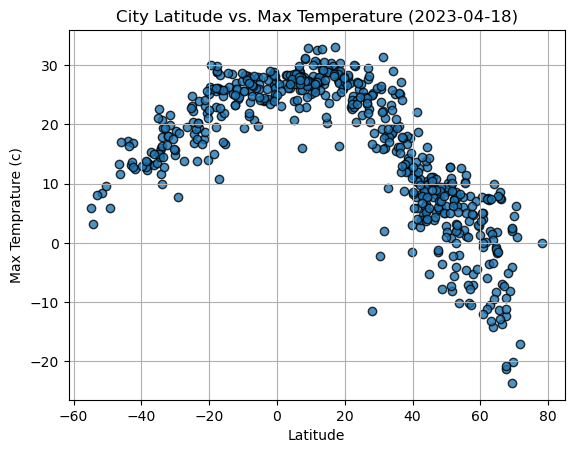

In [50]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (c)')
plt.title(f"City Latitude vs. Max Temperature ({datetime.datetime.now().strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

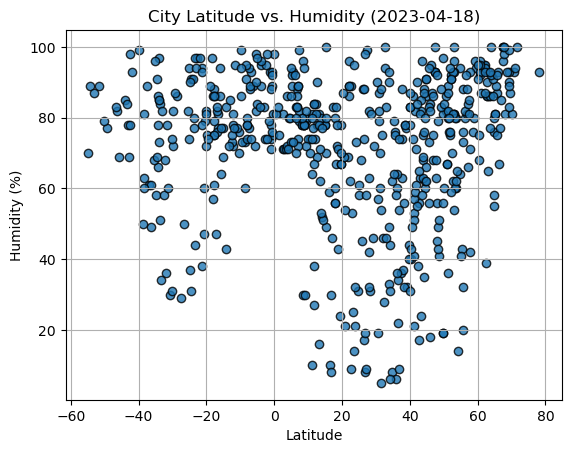

In [51]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.now().strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

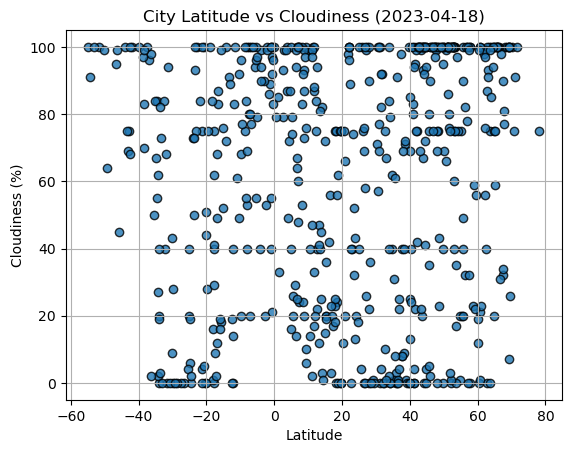

In [52]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({datetime.datetime.now().strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

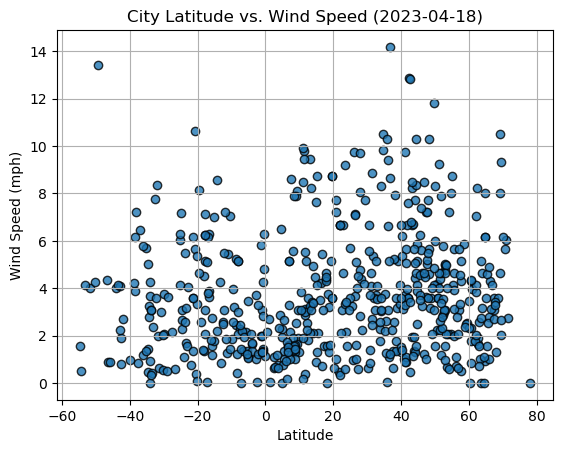

In [53]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.now().strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_value, y_values,x_label, y_label, text_coordinates, text_explanation):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # printing the r_value on the top of the plot
    print(f"The r-value is: {r_value**2:.3f}")
    # Plotting the scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates,fontsize=10,color='red')
    plt.xlabel(x_label, labelpad=10)
    plt.ylabel(y_label)
    # printing the explanation about the linear relationship
    plt.text(0.5, -0.2, f'Discussion about the linear relationship='+text_explanation , ha='center', va='center', transform=plt.gca().transAxes)
    
    

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,8.23,56,100,0.45,US,2023-04-18
8,kodiak,57.7900,-152.4072,4.73,42,0,5.14,US,2023-04-18
10,klyuchi,52.2667,79.1667,-5.50,92,100,5.77,RU,2023-04-18
13,ribeira grande,38.5167,-28.7000,14.32,78,71,1.79,PT,2023-04-18
15,la'ie,21.6477,-157.9253,26.98,69,98,0.45,US,2023-04-18


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,5.81,70,100,1.54,AR,2023-04-18
2,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,2023-04-18
3,grytviken,-54.2811,-36.5092,3.24,89,91,0.52,GS,2023-04-18
4,port-aux-francais,-49.3500,70.2167,5.82,77,64,13.44,TF,2023-04-18
5,west island,-12.1568,96.8225,26.99,78,40,3.09,CC,2023-04-18


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.770


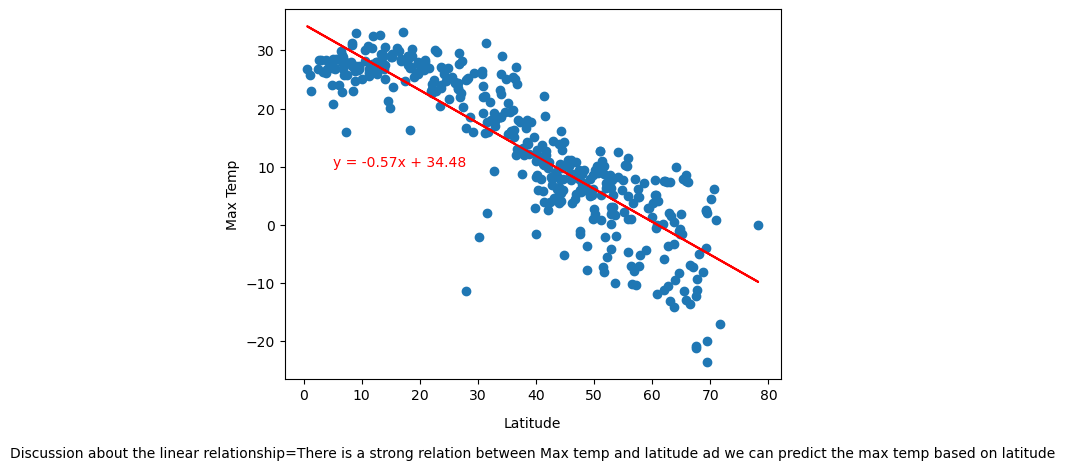

In [96]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp"
text_coordinates=(5,10)
text_explanation="There is a strong relation between Max temp and latitude ad we can predict the max temp based on latitude"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)


The r-value is: 0.673


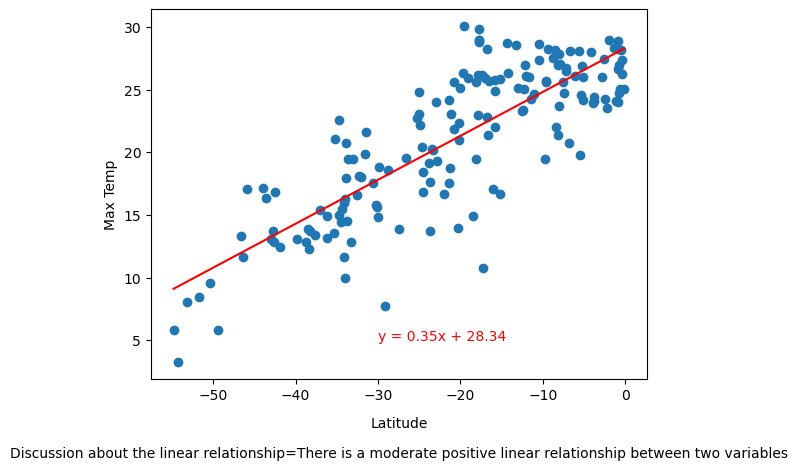

In [97]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp"
text_coordinates=(-30,5)
text_explanation="There is a moderate positive linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.030


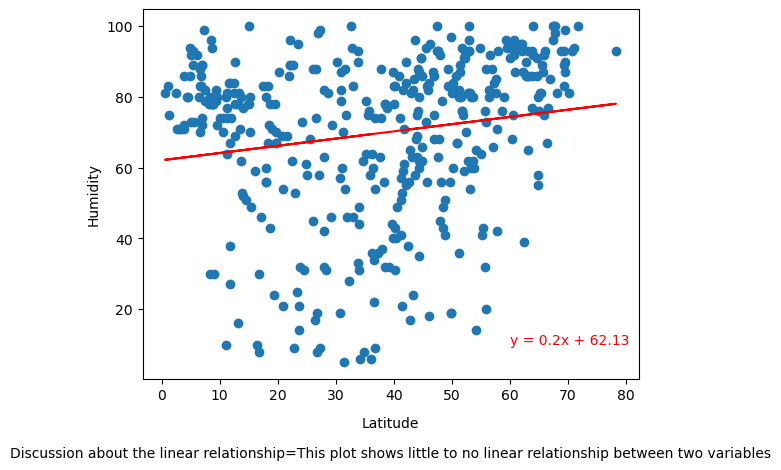

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity"
text_coordinates=(60,10)
text_explanation="This plot shows little to no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

The r-value is: 0.044


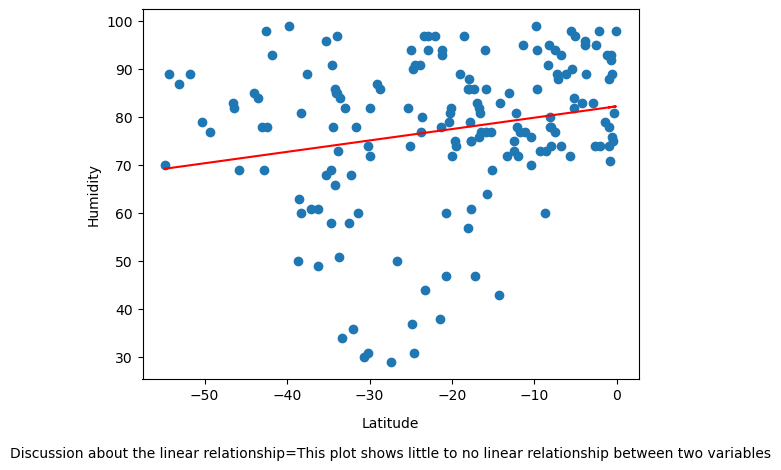

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity"
text_coordinates=(60,10)
text_explanation="This plot shows little to no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.026


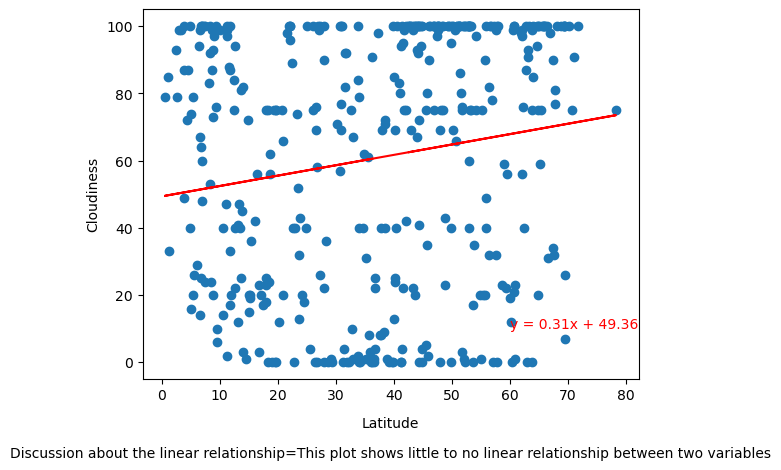

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness"
text_coordinates=(60,10)
text_explanation="This plot shows little to no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

The r-value is: 0.005


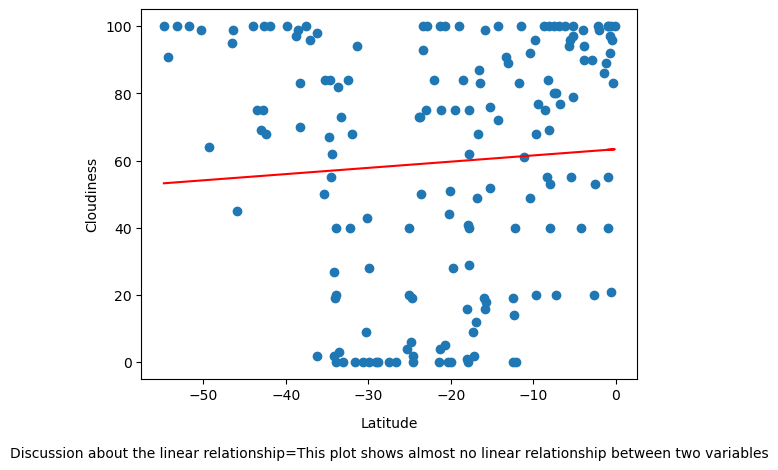

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness"
text_coordinates=(60,10)
text_explanation="This plot shows almost no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007


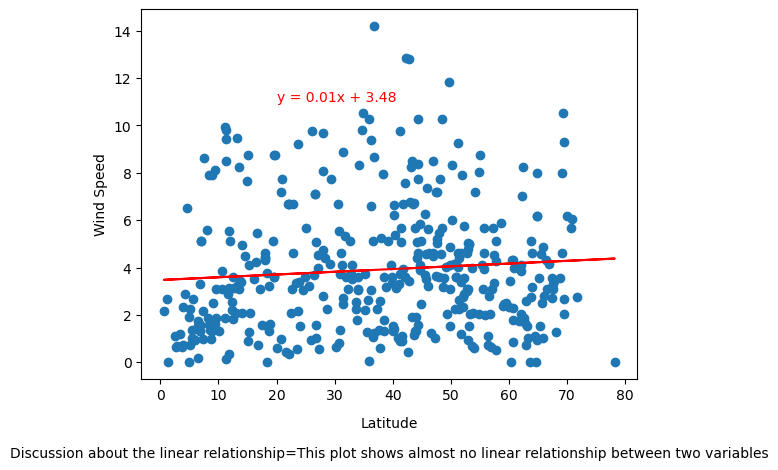

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed"
text_coordinates=(20,11)
text_explanation="This plot shows almost no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

The r-value is: 0.012


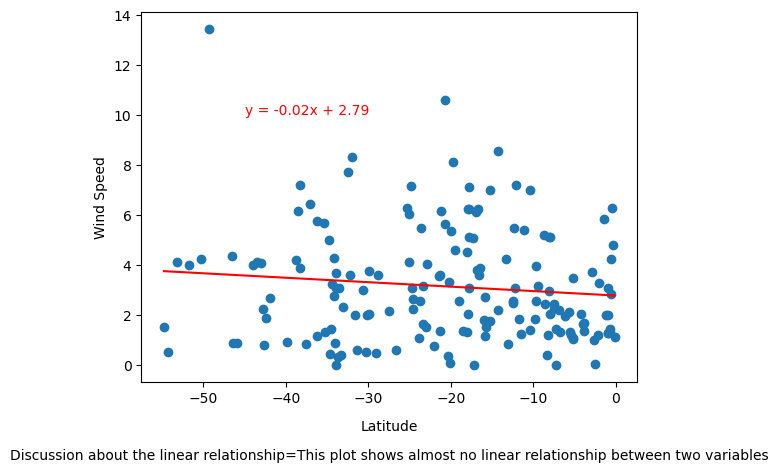

In [128]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed"
text_coordinates=(-45,10)
text_explanation="This plot shows almost no linear relationship between two variables"
linear_regression_plot(x_values, y_values,x_label, y_label, text_coordinates, text_explanation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE